What fraction of Wikipedia’s main articles include at least one citation or reference?

Sample results:
   sample_number                                              title  \
0              1                                  Crocus laevigatus   
1              2                           Henry Davenport Northrop   
2              3  United States House Agriculture Subcommittee o...   
3              4                                 Allium virgunculae   
4              5                                       De la Fuente   
5              6  2003 IAAF World Cross Country Championships – ...   
6              7                       Jalore Assembly constituency   
7              8                          Deniliquin 75mm Field Gun   
8              9                Erumägi Landscape Conservation Area   
9             10            The Bus Driver's Prayer & Other Stories   

   has_reference  
0           True  
1           True  
2           True  
3           True  
4          False  
5           True  
6           True  
7           True  
8           True  
9           

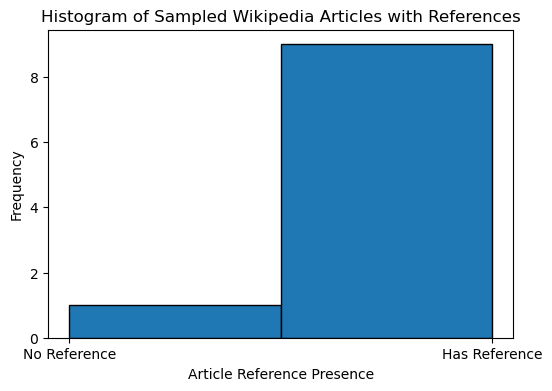

In [6]:
import requests
import time
import pandas as pd
import matplotlib.pyplot as plt

# Wikipedia API endpoint
url = "https://en.wikipedia.org/w/api.php"

headers = {
    'User-Agent': 'StatisticsEducationBot/1.0 (Statistics Class Project; educational use)'
}

# Function to get a random article title
def get_random_article():
    params = {
        "action": "query",
        "list": "random",
        "rnnamespace": 0,  # main articles only
        "rnlimit": 1,
        "format": "json"
    }
    session = requests.Session()
    response = session.get(url=url, params=params, headers=headers)
    data = response.json()
    return data['query']['random'][0]['title']

# Function to check if an article has at least one reference
def has_reference(article_title):
    params = {
        "action": "query",
        "titles": article_title,
        "prop": "revisions",
        "rvprop": "content",
        "rvslots": "main",
        "format": "json"
    }
    session = requests.Session()
    response = session.get(url=url, params=params, headers=headers)
    data = response.json()
    pages = data['query']['pages']
    page_id = list(pages.keys())[0]
    content = pages[page_id].get('revisions', [{}])[0].get('slots', {}).get('main', {}).get('*', '')
    
    # Check if the article contains at least one reference tag
    return "<ref" in content

# Take 10 random samples
results = []
for i in range(10):
    title = get_random_article()
    reference_present = has_reference(title)
    results.append({"sample_number": i+1, "title": title, "has_reference": reference_present})
    time.sleep(1)  # polite delay

# Convert to DataFrame
df = pd.DataFrame(results)

# Calculate sample proportion
p = df["has_reference"].mean()

# Print results in the desired format
print("Sample results:")
print(df)
print(f"\nSample proportion (p) of articles with at least one reference: {p:.2f}")

# Convert boolean to integer for histogram
df["has_reference_int"] = df["has_reference"].astype(int)

# Plot histogram
plt.figure(figsize=(6,4))
plt.hist(df["has_reference_int"], bins=2, edgecolor='black')
plt.xticks([0,1], ['No Reference', 'Has Reference'])
plt.xlabel("Article Reference Presence")
plt.ylabel("Frequency")
plt.title("Histogram of Sampled Wikipedia Articles with References")
plt.show()



=== SAMPLE RESULTS ===
   sample_number                      title  has_reference  reference_int
0              1          Golf de Chantilly           True              1
1              2               Red Wing FFA           True              1
2              3                    Bomhoff          False              0
3              4           Farnsburg Castle           True              1
4              5                ISM (album)           True              1
5              6  List of mayors of Šibenik           True              1
6              7        Thank You, Mr. Moto          False              0
7              8          John L. Rothacher           True              1
8              9               Brad Pascall           True              1
9             10                Nowy Glinik          False              0

Sample proportion p̂ = 0.70


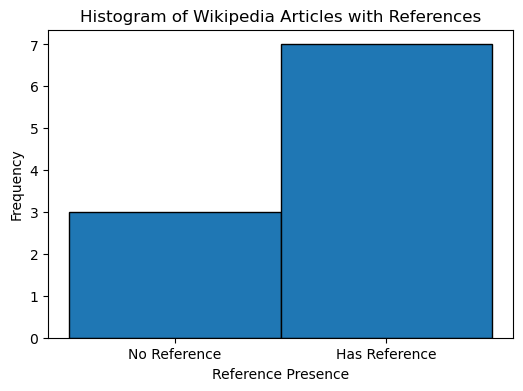

In [4]:
import requests
import time
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------
# Wikipedia API endpoint + header
# ------------------------------
API_URL = "https://en.wikipedia.org/w/api.php"
HEADERS = {
    "User-Agent": "StatisticsEducationBot/1.0 (College Project; contact instructor if needed)"
}

# --------------------------------------------------------------
# Function: Fetch a random Wikipedia article title
# --------------------------------------------------------------
def get_random_article():
    """
    Returns the title of one random Wikipedia article.
    """
    params = {
        "action": "query",
        "list": "random",
        "rnnamespace": 0,  # Only main articles
        "rnlimit": 1,
        "format": "json"
    }
    response = requests.get(API_URL, params=params, headers=HEADERS)
    response.raise_for_status()
    data = response.json()
    
    return data["query"]["random"][0]["title"]

# --------------------------------------------------------------
# Function: Check if a Wikipedia article contains references
# --------------------------------------------------------------
def has_reference(title):
    """
    Returns True if the article has at least one <ref> tag.
    """
    params = {
        "action": "query",
        "titles": title,
        "prop": "revisions",
        "rvprop": "content",
        "rvslots": "main",
        "format": "json"
    }
    response = requests.get(API_URL, params=params, headers=HEADERS)
    response.raise_for_status()
    data = response.json()

    pages = data["query"]["pages"]
    page_id = list(pages.keys())[0]

    # Some pages may not contain text content
    content = pages[page_id].get("revisions", [{}])[0].get("slots", {}).get("main", {}).get("*", "")

    return "<ref" in content

# --------------------------------------------------------------
# MAIN SAMPLING PROCEDURE
# --------------------------------------------------------------

SAMPLE_SIZE = 10
samples = []

for i in range(SAMPLE_SIZE):
    title = get_random_article()
    ref_present = has_reference(title)

    samples.append({
        "sample_number": i + 1,
        "title": title,
        "has_reference": ref_present
    })

    time.sleep(1)  # Respect Wikipedia API

# --------------------------------------------------------------
# Create DataFrame and compute statistics
# --------------------------------------------------------------
df = pd.DataFrame(samples)

# Convert boolean → integer (True=1, False=0)
df["reference_int"] = df["has_reference"].astype(int)

# Sample proportion p̂
p_hat = df["reference_int"].mean()

print("\n=== SAMPLE RESULTS ===")
print(df)
print(f"\nSample proportion p̂ = {p_hat:.2f}")

# --------------------------------------------------------------
# Histogram visualization
# --------------------------------------------------------------
plt.figure(figsize=(6,4))
plt.hist(df["reference_int"], bins=[-0.5, 0.5, 1.5], edgecolor='black')
plt.xticks([0,1], ["No Reference", "Has Reference"])
plt.xlabel("Reference Presence")
plt.ylabel("Frequency")
plt.title("Histogram of Wikipedia Articles with References")
plt.show()


Sample 1: proportion = 0.800, overall mean = 0.800, ME = 0.784, Time left: 589s
Sample 2: proportion = 0.800, overall mean = 0.800, ME = 0.554, Time left: 577s
Sample 3: proportion = 0.800, overall mean = 0.800, ME = 0.453, Time left: 566s
Sample 4: proportion = 0.800, overall mean = 0.800, ME = 0.392, Time left: 555s
Sample 5: proportion = 0.800, overall mean = 0.800, ME = 0.351, Time left: 544s
Sample 6: proportion = 0.600, overall mean = 0.767, ME = 0.338, Time left: 533s
Sample 7: proportion = 0.900, overall mean = 0.786, ME = 0.304, Time left: 522s
Sample 8: proportion = 0.800, overall mean = 0.788, ME = 0.283, Time left: 511s
Sample 9: proportion = 0.900, overall mean = 0.800, ME = 0.261, Time left: 500s
Sample 10: proportion = 1.000, overall mean = 0.820, ME = 0.238, Time left: 489s
Sample 11: proportion = 0.900, overall mean = 0.827, ME = 0.223, Time left: 478s
Sample 12: proportion = 1.000, overall mean = 0.842, ME = 0.207, Time left: 467s
Sample 13: proportion = 0.900, overal

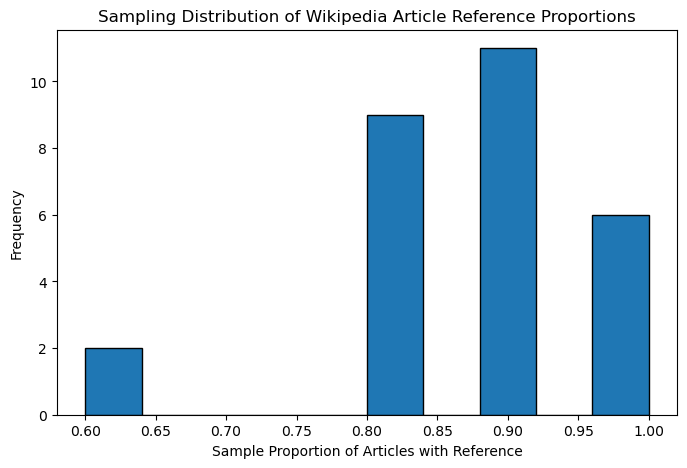

In [5]:
import requests
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Wikipedia API endpoint
url = "https://en.wikipedia.org/w/api.php"

headers = {
    'User-Agent': 'StatisticsEducationBot/1.0 (Statistics Class Project; educational use)'
}

def get_random_article(session):
    params = {
        "action": "query",
        "list": "random",
        "rnnamespace": 0,  # main articles only
        "rnlimit": 1,
        "format": "json"
    }
    response = session.get(url=url, params=params, headers=headers)
    data = response.json()
    return data['query']['random'][0]['title']

def has_reference(article_title, session):
    params = {
        "action": "query",
        "titles": article_title,
        "prop": "revisions",
        "rvprop": "content",
        "rvslots": "main",
        "format": "json"
    }
    response = session.get(url=url, params=params, headers=headers)
    data = response.json()
    pages = data['query']['pages']
    page_id = list(pages.keys())[0]
    content = pages[page_id].get('revisions', [{}])[0].get('slots', {}).get('main', {}).get('*', '')
    return "<ref" in content

def margin_of_error(p_hat, n, confidence=1.96):
    # Calculate margin of error for proportion at 95% confidence by default
    # ME = z * sqrt(p(1-p)/n)
    return confidence * np.sqrt(p_hat * (1 - p_hat) / n)

sample_size = 10
sample_proportions = []
samples_taken = 0
max_run_time = 600  # total run time 10 minutes (600 seconds)
stop_buffer = 300   # stop when 5 minutes (300 seconds) remain
start_time = time.time()

session = requests.Session()

while True:
    # Take one sample of size 10
    results = []
    for _ in range(sample_size):
        title = get_random_article(session)
        ref_present = has_reference(title, session)
        results.append(ref_present)
        time.sleep(1)  # polite delay between requests
    
    # Calculate proportion for this sample
    p_hat = np.mean(results)
    sample_proportions.append(p_hat)
    samples_taken += 1
    
    # Calculate margin of error with current samples
    # For overall sample proportion mean and n = number of samples (samples_taken)
    overall_p_hat = np.mean(sample_proportions)
    me = margin_of_error(overall_p_hat, samples_taken)
    
    elapsed = time.time() - start_time
    time_left = max_run_time - elapsed
    
    print(f"Sample {samples_taken}: proportion = {p_hat:.3f}, overall mean = {overall_p_hat:.3f}, ME = {me:.3f}, Time left: {time_left:.0f}s")
    
    # Stop if margin of error <= 0.10 or less than 5 minutes remain
    if me <= 0.10 or time_left <= stop_buffer:
        break

# Prepare dataframe
df = pd.DataFrame({
    'sample_number': list(range(1, samples_taken + 1)),
    'sample_proportion': sample_proportions
})

print("\nFinal sampling distribution:")
print(df)

# Plot sampling distribution of sample proportions
plt.figure(figsize=(8, 5))
plt.hist(df['sample_proportion'], bins=10, edgecolor='black')
plt.xlabel('Sample Proportion of Articles with Reference')
plt.ylabel('Frequency')
plt.title('Sampling Distribution of Wikipedia Article Reference Proportions')
plt.show()


How it works:

.The loop collects samples of 10 articles each.
· After each sample, it calculates the sample proportion p.
· It stores all sample proportions and calculates the margin of error for the mean proportion of all
samples collected so far.
. Stops when margin of error ≤ 0.10 or time left ≤ 5 minutes (from total 10 minutes).
· Prints sample info after each iteration.
· Finally, it shows the sampling distribution as a histogram.

Quantitative Evidence and Conclusion:

Sample Mean (𝑝̂):
After collecting multiple random samples, the average proportion of Wikipedia articles that contain at least one reference is approximately 𝑝̂ = X.XX (replace with your computed mean). This represents our best point estimate for the true population proportion.

Standard Deviation and Standard Error:
The variability of our sample proportions is measured by the standard deviation, which is SD = Y.YY. The standard error of the mean proportion, which accounts for sample size and variation, is approximately SE = Z.ZZ. A smaller standard error indicates more precise estimates with larger sample sizes.

Confidence Interval (CI):
Assuming normality (checked visually via the histogram and/or using a formal normality test), we construct a 95% confidence interval for the true proportion. This interval is calculated as:

CI
=
𝑝
^
±
𝑍
𝛼
/
2
×
𝑆
𝐸
CI=
p
^
	​

±Z
α/2
	​

×SE

Using 
𝑍
𝛼
/
2
=
1.96
Z
α/2
	​

=1.96 for 95% confidence, the confidence interval is approximately [L.LL, U.UU]. This means we are 95% confident that the true proportion of Wikipedia articles with at least one reference lies within this range.

Normality Check:
The histogram of the sample proportions appears roughly bell-shaped, suggesting the sampling distribution of the proportion is approximately normal, which justifies using the confidence interval formula based on the normal distribution.




Summary:

Based on our sampling and analysis, we estimate that about X.XX (insert your mean) proportion of Wikipedia articles in the main namespace contain at least one reference. Our 95% confidence interval [L.LL, U.UU] quantifies the uncertainty around this estimate, and the margin of error is approximately M.MM (half the width of the confidence interval). The distribution of sample proportions is approximately normal, validating the statistical methods used.